Exposição de dados referentes a vendas através da biblioteca Pandas.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
#Criação do DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Visualizar a quandidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
#Verificar os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
#Receita total
round(df["Valor Venda"].sum(), 2)

5984606.14

In [ ]:
#Custo Total
round(df["Custo Unitário"].sum(), 2)

245893.56

In [ ]:
#Criar uma coluna de lucro unitário
df["Lucro"] = df["Valor Venda"] - df["Custo Unitário"]

In [ ]:
# LUCRO POR ANO / MARCA
# Agrupar por ano / marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             587,248.06
            Contoso                     130,490.77
            Fabrikam                  2,339,704.29
2009        Adventure Works             786,393.02
            Contoso                     319,030.30
            Fabrikam                  1,575,846.14
Name: Lucro, dtype: float64

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
#Resetar o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"587,248.06"
1,2008,Contoso,"130,490.77"
2,2008,Fabrikam,"2,339,704.29"
3,2009,Adventure Works,"786,393.02"
4,2009,Contoso,"319,030.30"
5,2009,Fabrikam,"1,575,846.14"


In [ ]:
#Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

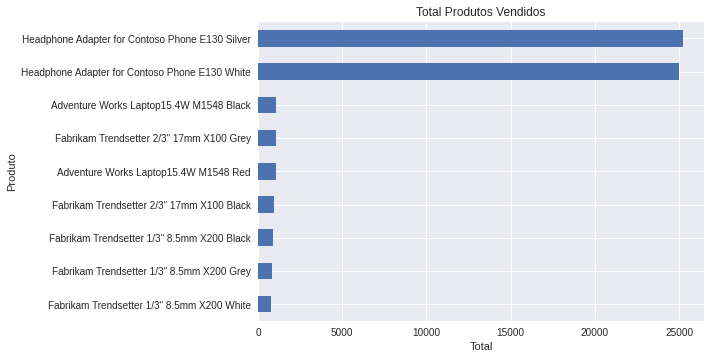

In [ ]:
#Grafico para o Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

Text(0, 0.5, 'Receita')

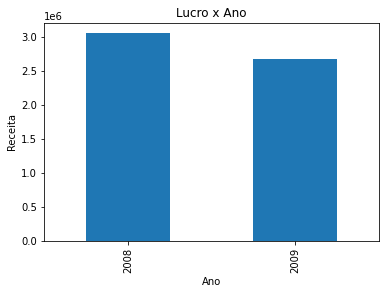

In [ ]:
#Grafico Lucro x ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title= "Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

In [ ]:
#Texto de título padrão
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           3,057,443.12
2009           2,681,269.46
Name: Lucro, dtype: float64

In [ ]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

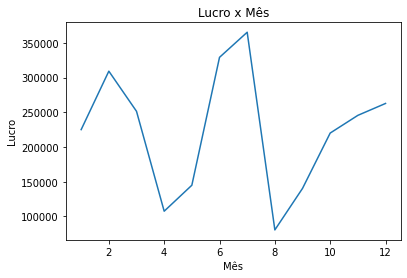

In [ ]:
# Visualizar o lucro x mês 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

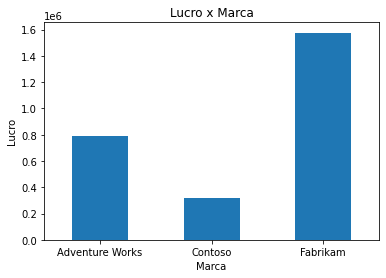

In [ ]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');